# Data Preparation Techniques Project

*Group Members:*
<ul>
<li>Mehadi Hassan</li>
<li> Hridita Tabassum</li>
</ul>


## Iteration 01

### Part 1: Dataset Presentation


### **The Dataset**
The dataset we are working with is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. It is publicly available in Kaggle. The goal of this dataset is to predict whether the person has 10 year risk of heart diseases. This dataset is publicly available in Kaggle (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression)

There are 16 column in this dataset. They are:
* **male**: Whether the patient is male or female (Nominal: 1 means male and 0 means female). Men are more prone to heart diseases than women. So, the risk of gender varies depending on the gender. 
* **age**: Age of the patient. It is a well known fact that the risk of heart diseases increases with age.
* **Education**: This column represents the level of education from 1 to 4.
* **currentSmoker**: Whether or not the patient is a current smoker (Nominal). Smoking plays an important role whether a person will be affected with heart disease or not.
* **cigsPerDay**: the number of cigarettes that the person smoked on average in one day
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **diabetes**: whether or not the patient had diabetes (Nominal). People with high diabetes are more tend to have heart attack as it effects the regular blood flow.
* **totChol**: total cholesterol level (Continuous). A normal human contains 200mg/dL level of cholestrol. If the level increases it may lead to a heart disease.
* **SysBP**: systolic blood pressure (Continuous). Blood pressure normally remains 120/80 or lower. Higher blood pressure will signify more stress on the heart.
* **diaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate**: heart rate (Continuous) 60 to 100 beats per minute signifies regular. Generally a lower level signifies a better heart condition.
* **Glucose**: if the glucose level (Continuous) is too high it can damage one's heart which may result in a coronary heart disease.
* **TenYearCHD**: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
     

In [1]:
# Importing all the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [2]:
# First  We will read the data
df = pd.read_csv('Dataset.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In the dataset there is a column named education which shows the education of the a person. This column is not necessary here as it does not have effect on the probability of 10 year risk of coronary heart disease. So, we will drop the column.

In [4]:
#column drop
df = df.drop('education', axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#data describe
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From the describe method we can see that the count values of the attributes are not the same which signifies that there are missing values in the dataset. Moreover, we can see outliers in the dataset for example, glucose attribute as the minimum is 40, the mean is 81.9, and most of the data are within 87 (75%) but highest value shows 394 which is too high for a human being.

#### Checking distribution for all of the column
Now we will observe the data distribution of each column so that we can decide which centrality measure will be better for them.

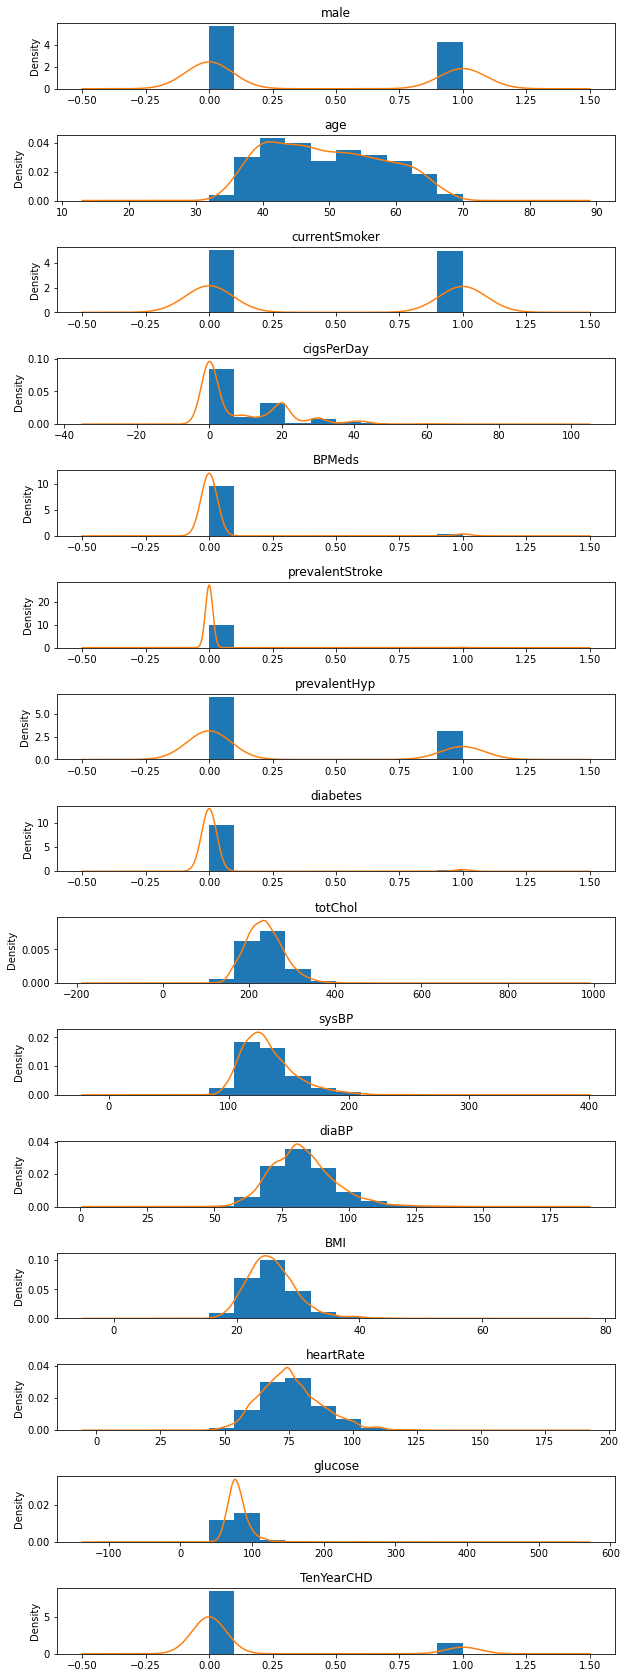

In [6]:
#Plotting density diagram for all columns
fig, axs = plt.subplots(len(df.columns),1,figsize=(10,30))
plt.subplots_adjust(hspace = .7)
axs = axs.flatten()
i =0
for c in df.columns:
    df[c].hist(ax=axs[i], density=True)
    df[c].plot.density(ax=axs[i],title=c, rot=0)
    i+=1

##### **Now we will create array for column names of continous value column and numerical value columns**
As we can see from the previous dataframe information and histogram, 
age, cigsPerDay, totChol ,sysBP ,diaBP, BMI, heartRate, glucose columns contain continous values and male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes contains nominal values. So we will use different approach to analyze them.

In [7]:
# now we will separate continuous and binary value columns
c_dt_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
b_dt_col = ['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

For the columns with nominal values, we will see the count of  in compare to the TenYearCHD column which indicates whether a person has the risk of coronary heart diseases.

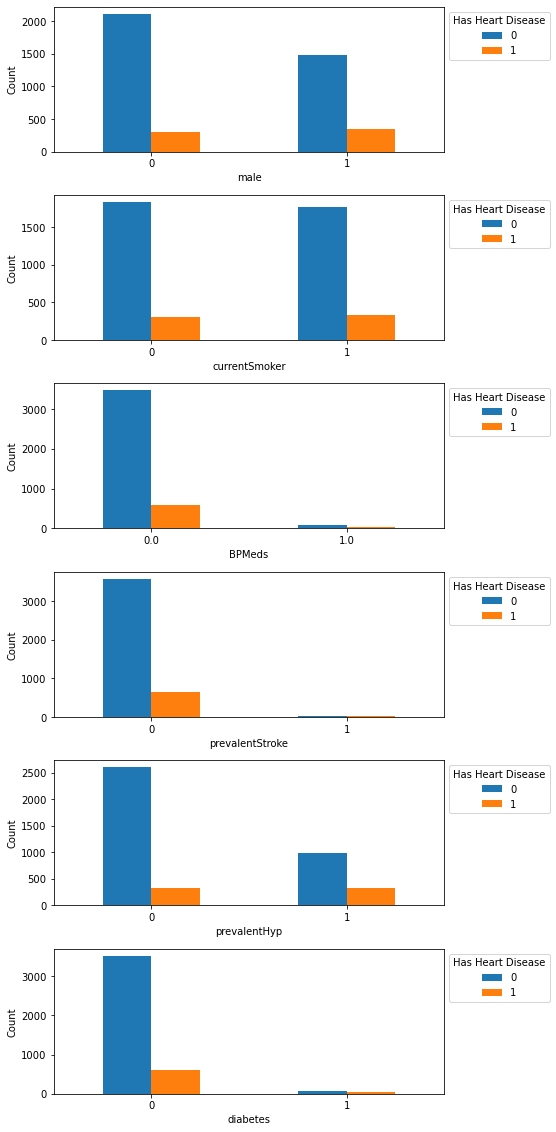

In [8]:
#Plotting count value for all columns with nominal values
fig, axs = plt.subplots(len(b_dt_col),1,figsize=(7,20))
plt.subplots_adjust(hspace = .3)
axs = axs.flatten()
i = 0
for c in b_dt_col:
    a = df.groupby(df[c])['TenYearCHD'].value_counts().unstack()
    a.plot(ax=axs[i],kind='bar',  xlabel=c, ylabel='Count', rot=0)
    axs[i].legend(title='Has Heart Disease', bbox_to_anchor=(1, 1), loc='upper left')
    i+=1


From the previous bar charts we can see that counts for each column is not balanced. The risk of not getting coronary heart disease is higher for each column. So, let us see the data count for our target column.

/var/folders/1k/rnwhmv7j201gz_bvl66lnc900000gn/T/ipykernel_2666/4072433516.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


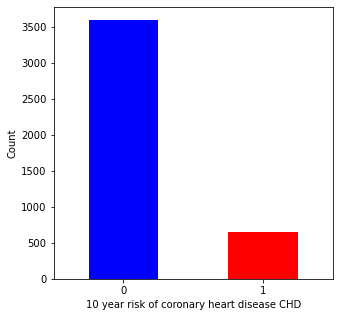

In [9]:
#plotting bar chart with TenYearCHD column's count
a = df['TenYearCHD'].value_counts()
fig, axs = plt.subplots(1,1,figsize=(5,5))
a.plot(ax=axs,kind='bar',  xlabel='10 year risk of coronary heart disease CHD', ylabel='Count', rot=0,color=['blue','red'])
fig.show()

Now, we will analyze the columns with continuous values. For that we will create 2 data frame from our main dataset. One will be where the target value (TenYearCHD column) is 0 and other is where target value is 1. Then, we will observe the data distribution for each attribute and how they compare with each other. 

In [10]:
#creating 2 dataframe
chd_true  = df.loc[df['TenYearCHD']==1]
chd_false = df.loc[df['TenYearCHD']==0]

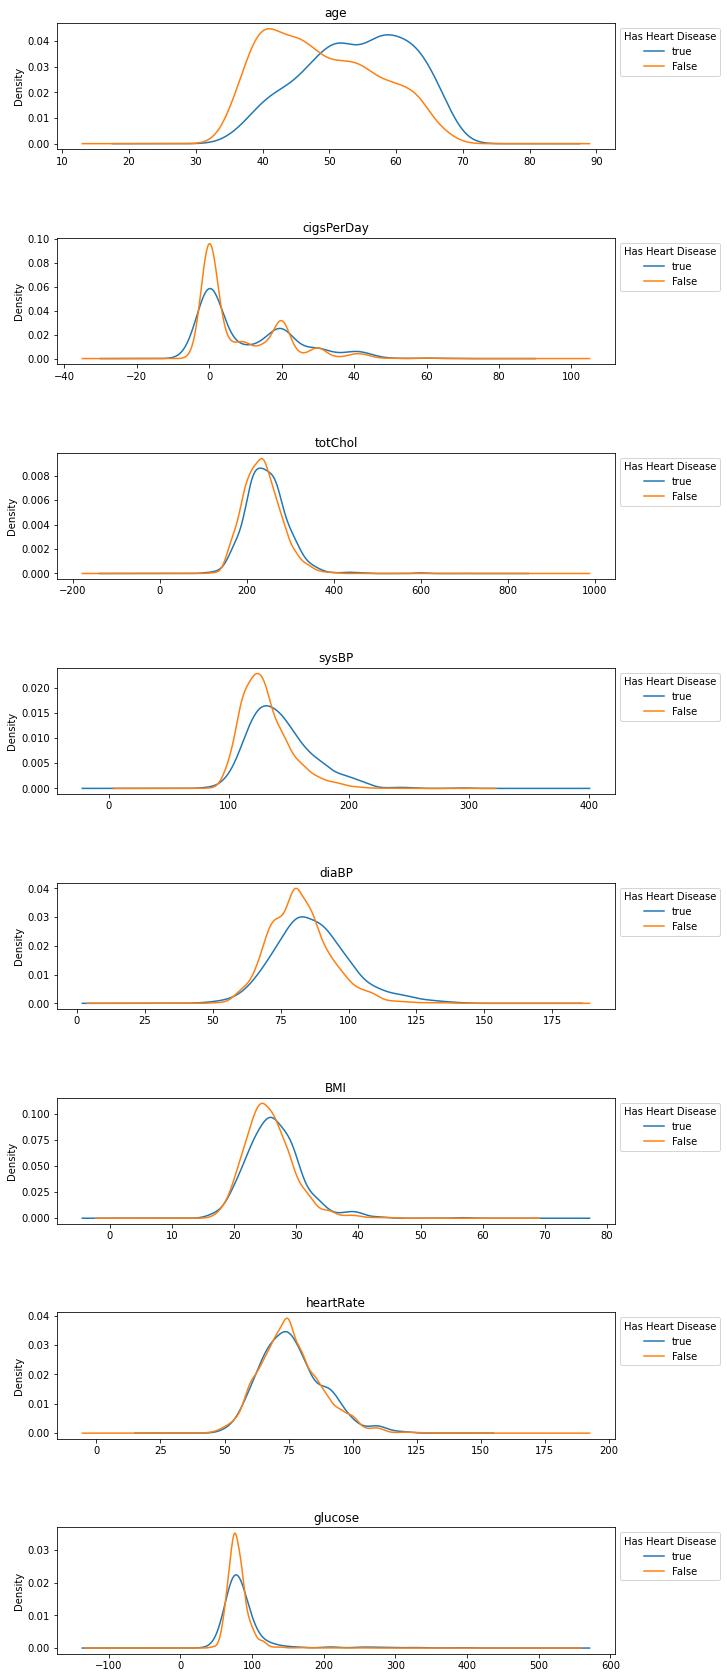

In [11]:
#density plot for both dataframe
fig, axs = plt.subplots(len(c_dt_col),1,figsize=(10,30))
plt.subplots_adjust(hspace = .7)
axs = axs.flatten()
i =0
for c in c_dt_col:
    chd_true[c].plot.density(ax=axs[i],label= 'true', rot=0)
    chd_false[c].plot.density(ax=axs[i],title=c,label='False', rot=0)
    axs[i].legend(title='Has Heart Disease', bbox_to_anchor=(1, 1), loc='upper left')
    i+=1

### Part 2: Data Cleaning

Our target is to clean the dataset from missing values and outliers which will result a complete Dataframe containing no issues.

Finding out the  missing values and removing them from the dataframe

In [12]:
# Counting the missing values from the original dataframe
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
# Saving the missing value rows in df_na_values
df_na_values = df[df.isna().any(axis=1)]

In [14]:
# Dropping the rows that contains missing value from the original dataframe
df = df.dropna()

In [15]:
# Checking the missing value Dataframe. All the missing value rows are now in df_na_values
df_na_values.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
# Checking the main dataframe after we have dropped the missing values.
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
# Shape of the dataframe after dropping the missing rows
df.shape

(3749, 15)

In [18]:
# Shape of the dataframe containing the missing rows
df_na_values.shape

(489, 15)

As we have removed the missing values from our dataframe we will now perform a box plot to check for outliers.

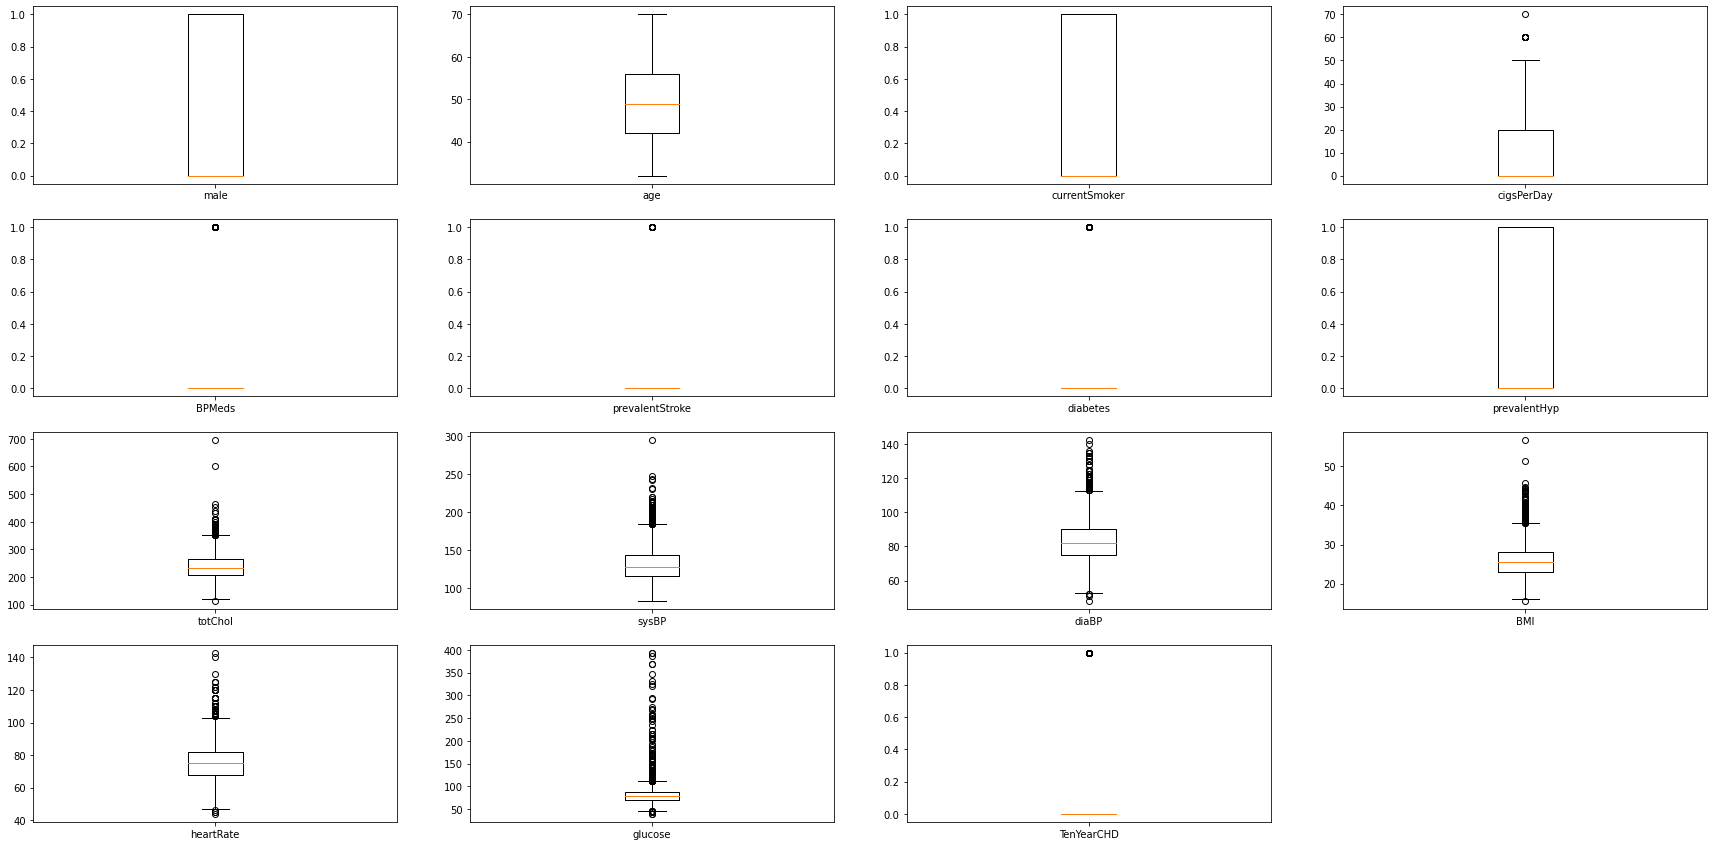

In [19]:
# Box plotting all the attributes to check for outliers

fig, axs = plt.subplots(4, 4, figsize=(30, 15))
axs=axs.flatten()

axs[0].boxplot(df['male'], labels=['male'])
axs[1].boxplot(df['age'], labels=['age'])
axs[2].boxplot(df['currentSmoker'], labels=['currentSmoker'])
axs[3].boxplot(df['cigsPerDay'], labels=['cigsPerDay'])
axs[4].boxplot(df['BPMeds'], labels=['BPMeds'])
axs[5].boxplot(df['prevalentStroke'], labels=['prevalentStroke'])
axs[6].boxplot(df['diabetes'], labels=['diabetes'])
axs[7].boxplot(df['prevalentHyp'], labels=['prevalentHyp'])
axs[8].boxplot(df['totChol'], labels=['totChol'])
axs[9].boxplot(df['sysBP'], labels=['sysBP'])
axs[10].boxplot(df['diaBP'], labels=['diaBP'])
axs[11].boxplot(df['BMI'], labels=['BMI'])
axs[12].boxplot(df['heartRate'], labels=['heartRate'])
axs[13].boxplot(df['glucose'], labels=['glucose'])
axs[14].boxplot(df['TenYearCHD'], labels=['TenYearCHD'])
axs[15].set_axis_off()
plt.show()

From the above box plots we can see that couple of attributes contains outliers. Few of our attributes are binary values (male, currentSmoker, BPMeds and others) and it only has 0 or 1 in them. We will be focusing on non binary attributes (totChol, sysBP, diaBP and others) to find and remove the outliers.

We will be finding the maximum and minimum range using the inter quantile and apply the filter on the dataframe to clean the dataset. Boxplot is effective as it shows the outliers within the plots by showing the data range. Generally the data that falls outside the  $Q1 - 1.5 * IQR$ are the outliers on the lower side and the data that falls after the $Q3 + 1.5 * IQR$ are considered as outliers on the maximum side.

In [20]:
# This list will hold the outlier dataframe and later we will concat it.
outliers_list = []

In [21]:
# This method returns percentage of outliers in a particular attributes
def outliers_percentage(data, column_name):
    Q1 = data[column_name].quantile(0.25) # Finding quantile 01 
    Q3 = data[column_name].quantile(0.75) # Finding quantile 03 
    IQR = Q3 - Q1 # Inter quantile range

    minimum  = Q1 - 1.5 * IQR # finding the minimum value to filter data
    maximum = Q3 + 1.5 * IQR # finding the maximum value to filter data
    
    # Filtering data that are below the minimum values or after the maximum value which are identified as outliers.
    filter = (data[column_name] <= minimum) | (data[column_name] >= maximum) 
    print(f"Outliers in {column_name} " + str(round(filter.sum() * 100 / len(data), 2)) + "%")

In [22]:
# Checking outlier percentage on the non binary
outliers_percentage(df , 'cigsPerDay')
outliers_percentage(df , 'totChol')
outliers_percentage(df , 'sysBP')
outliers_percentage(df , 'diaBP')
outliers_percentage(df , 'BMI')
outliers_percentage(df , 'heartRate')
outliers_percentage(df , 'glucose')

Outliers in cigsPerDay 0.4%
Outliers in totChol 1.17%
Outliers in sysBP 2.99%
Outliers in diaBP 1.92%
Outliers in BMI 2.29%
Outliers in heartRate 2.29%
Outliers in glucose 4.96%


In [23]:
# This method will check if there are outliers and will return a boolean value.
def are_outliers(data , column_name):
    Q1 = data[column_name].quantile(0.25) # Finding quantile 01 
    Q3 = data[column_name].quantile(0.75) # Finding quantile 03
    IQR = Q3 - Q1 # Inter quantile range

    minimum  = Q1 - 1.5 * IQR # finding the minimum value to filter data
    maximum = Q3 + 1.5 * IQR # finding the maximum value to filter data
    
    # Filtering data that are below the minimum values or after the maximum value which are identified as outliers.
    filter = (data[column_name] <= minimum) | (data[column_name] >= maximum)

    # Applying the filter on the dataframe to check if there are rows within that range.
    # If the shape of the dataframe is Zero (0) after applying the filter then there are no outliers as a result returning False else returning True indicating there are outliers present.
    if data.loc[filter].shape[0] == 0:
        return False
    else:
        outliers_list.append(data.loc[filter])
        return True

In [24]:
# This method removes the outliers from the attribute
def remove_outliers(data , column_name):
    while are_outliers(data, column_name):
        Q1 = data[column_name].quantile(0.25) # Finding Quantile 01
        Q3 = data[column_name].quantile(0.75) # Finding Quantile 03
        IQR = Q3 - Q1  # Inter Quantile Range

        minimum  = Q1 - 1.5 * IQR # finding the minimum value to filter data
        maximum = Q3 + 1.5 * IQR # finding the maximum value to filter data

        # Filtering out the data within the minimum and maximum range. This Filter contains all the data without the outliers.
        filter = (data[column_name] > minimum) & (data[column_name] < maximum)
        
        data = data.loc[filter] # Applying the filter to locate the data.
    return data

In [25]:
# Running a while loop to first check if there are any outliers on the attributes if yes then remove the outliers.
while are_outliers(df, 'cigsPerDay') or are_outliers(df , 'totChol') or are_outliers(df , 'sysBP') or are_outliers(df , 'diaBP') or are_outliers(df , 'BMI') or are_outliers(df , 'heartRate') or are_outliers(df , 'glucose'):
    df = remove_outliers(df , 'cigsPerDay')
    df = remove_outliers(df , 'totChol')
    df = remove_outliers(df , 'sysBP')
    df = remove_outliers(df , 'diaBP')
    df = remove_outliers(df , 'BMI')
    df = remove_outliers(df , 'heartRate')
    df = remove_outliers(df , 'glucose')


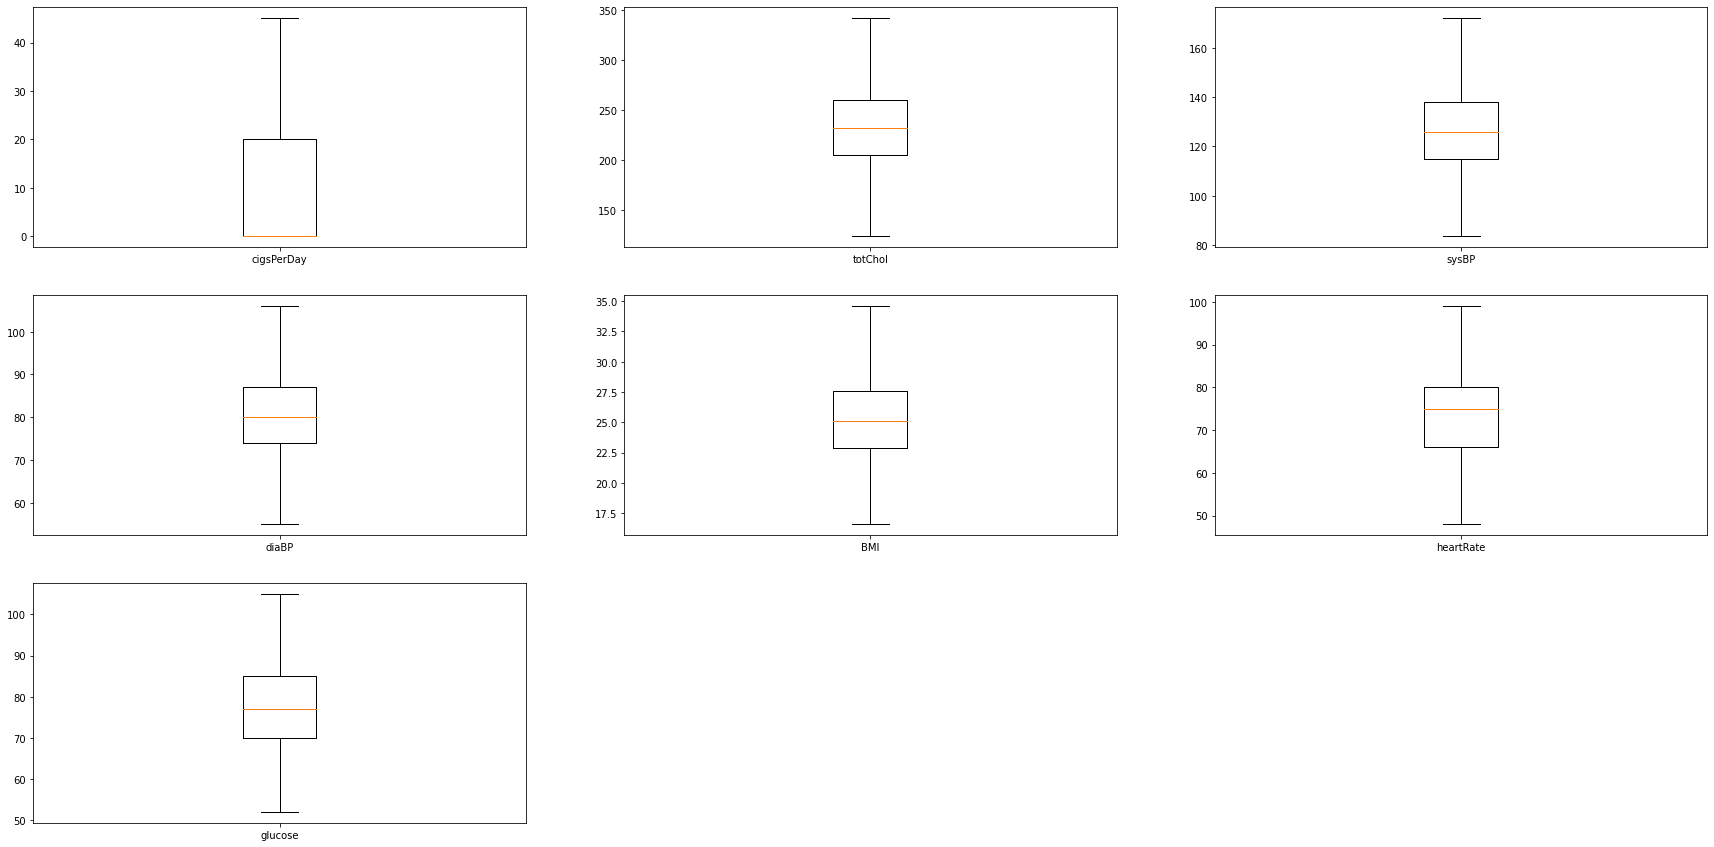

In [26]:
# Plotting the dataframe attributes after removing all the outliers.

fig, axs = plt.subplots(3, 3, figsize=(30, 15))
axs=axs.flatten() 
axs[0].boxplot(df['cigsPerDay'], labels=['cigsPerDay'])
axs[1].boxplot(df['totChol'], labels=['totChol'])
axs[2].boxplot(df['sysBP'], labels=['sysBP'])
axs[3].boxplot(df['diaBP'], labels=['diaBP'])
axs[4].boxplot(df['BMI'], labels=['BMI'])
axs[5].boxplot(df['heartRate'], labels=['heartRate'])
axs[6].boxplot(df['glucose'], labels=['glucose'])
axs[7].set_axis_off()
axs[8].set_axis_off()

plt.show()

After removing the outliers we can see that all the non binary values have no outliers in them and which serves out our purpose to make a clean dataframe without any outliers and missing values.

In [27]:
# Concating all the outliers dataframe in a single dataframe
outliers_df = pd.concat(outliers_list)

In [28]:
# Checking outlier percentage on the non binary columns after removing the outliers
outliers_percentage(df , 'cigsPerDay')
outliers_percentage(df , 'totChol')
outliers_percentage(df , 'sysBP')
outliers_percentage(df , 'diaBP')
outliers_percentage(df , 'BMI')
outliers_percentage(df , 'heartRate')
outliers_percentage(df , 'glucose')

Outliers in cigsPerDay 0.0%
Outliers in totChol 0.0%
Outliers in sysBP 0.0%
Outliers in diaBP 0.0%
Outliers in BMI 0.0%
Outliers in heartRate 0.0%
Outliers in glucose 0.0%


In [29]:
# Dataframe containing all the outliers
outliers_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
327,1,56,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,1,59,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,1,58,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1360,1,47,1,50.0,0.0,0,0,0,217.0,145.0,89.0,28.88,82.0,75.0,0
1452,1,39,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,1,47,0,0.0,0.0,0,1,0,270.0,152.5,108.0,26.09,90.0,88.0,1
526,0,46,1,1.0,0.0,0,0,0,241.0,130.0,82.0,34.84,62.0,93.0,0
2616,1,44,1,25.0,0.0,0,0,0,210.0,103.0,78.0,34.89,62.0,77.0,0
3005,0,53,1,20.0,0.0,0,1,0,181.0,163.5,87.0,34.69,80.0,71.0,0


#### Final Dataframe without any outliers and missing values

In [30]:
# Original Dataframe after cleaning all the outliers and missing values.
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,1,58,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4227,1,43,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


## Iteration 02

### Part 01: Addressing instructor’s comments from Iteration 1

We did not receive any feedback to change or modify anything from iteration 01. As a result, we are staring our IT 02 from Part 02

### Part 02: Data Scalling Techniques

The dataframe contains various types of data in different magnitudes and units. It is always helpful to train an ML model to scale the data as it will transform all the data in a specific range despite their units and magnitude. Let's try few data scaling techniques. The whole dataframe contains numeric values so there aren't any features to encode here.

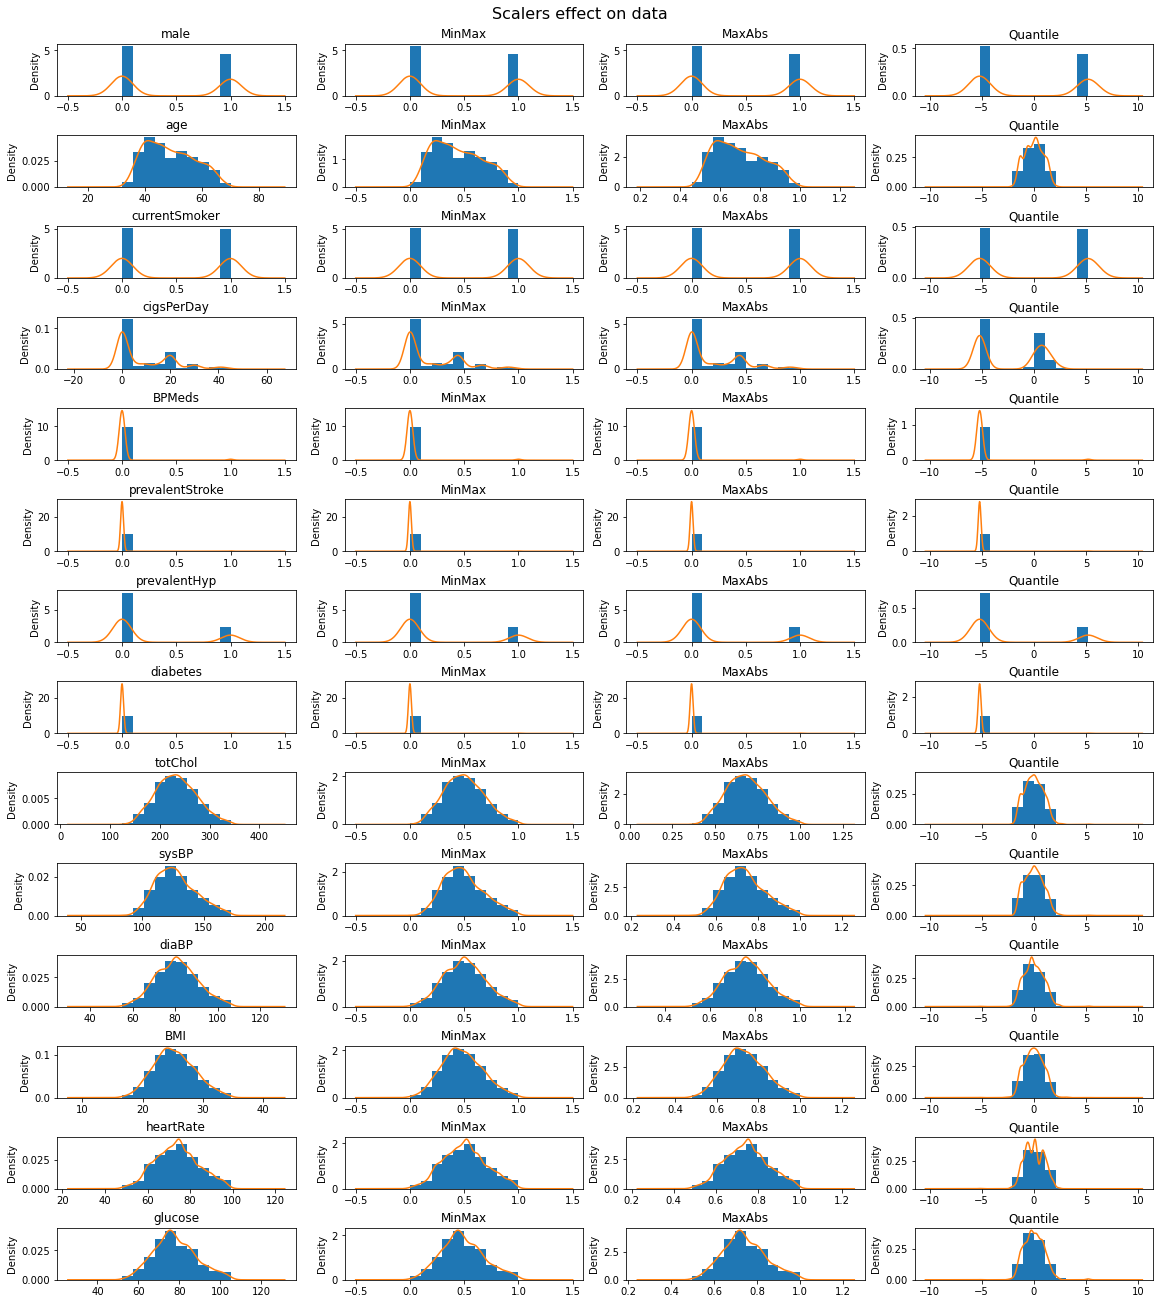

In [31]:
# This method will plot the data side by side with all the scaling techniques.
def plot_histograms_density_for_scalers(df , columns , fig_title , scalers , scaler_names):
    fig , axs = plt.subplots(len(columns) , len(scalers) + 1 , figsize = (16 , 18) , constrained_layout = True)
    fig.suptitle(fig_title , fontsize = 16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax = axs[i] , density = True)
        df[c].plot.density(ax = axs[i] , title = c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed , index = df.index , columns = df.columns)
            df_transformed[c].hist(ax = axs[i] , density = True , stacked = True)
            df_transformed[c].plot.density(ax = axs[i] , title = scaler_names[j])
            i+=1
            
val_cols_names = ['male' , 'age' , 'currentSmoker' , 'cigsPerDay' , 'BPMeds' , 'prevalentStroke' , 'prevalentHyp' , 'diabetes' , 'totChol' , 'sysBP' , 'diaBP' , 'BMI' , 'heartRate' , 'glucose']
scaler_names = ['MinMax' , 'MaxAbs' , 'Quantile'] # Scaler lists
arr_scalers = [MinMaxScaler() ,  MaxAbsScaler() , QuantileTransformer(n_quantiles = 10 , random_state = 0 , output_distribution = 'normal')] # Scaler Methods
plot_histograms_density_for_scalers(df , val_cols_names , 'Scalers effect on data' , arr_scalers , scaler_names) # Plotting all the features with different scaling techniques side by side

There are different types of scaling techniques that can be applied. I have used Min Max Scaler, which transforms the data between the 0 to 1 range; Max Abs Scaler, which scales the data in such format where the maximum value in each feature is one and Quantile scaler, which transforms the data in uniform or normal distribution based on the quantile range. These scaling techniques don’t distort the original data frame and make a uniform distribution.

### Part 03: Handling missing data and outliers

From the Iteration 01 we have saved the rows with missing values in df_na_values. From the na sum we can see that 6 columns have missing values which are cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose. In this section we will try to forecast the missing values using ML techniques.

In [32]:
# Checking the features that contains null values.
df_na_values.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

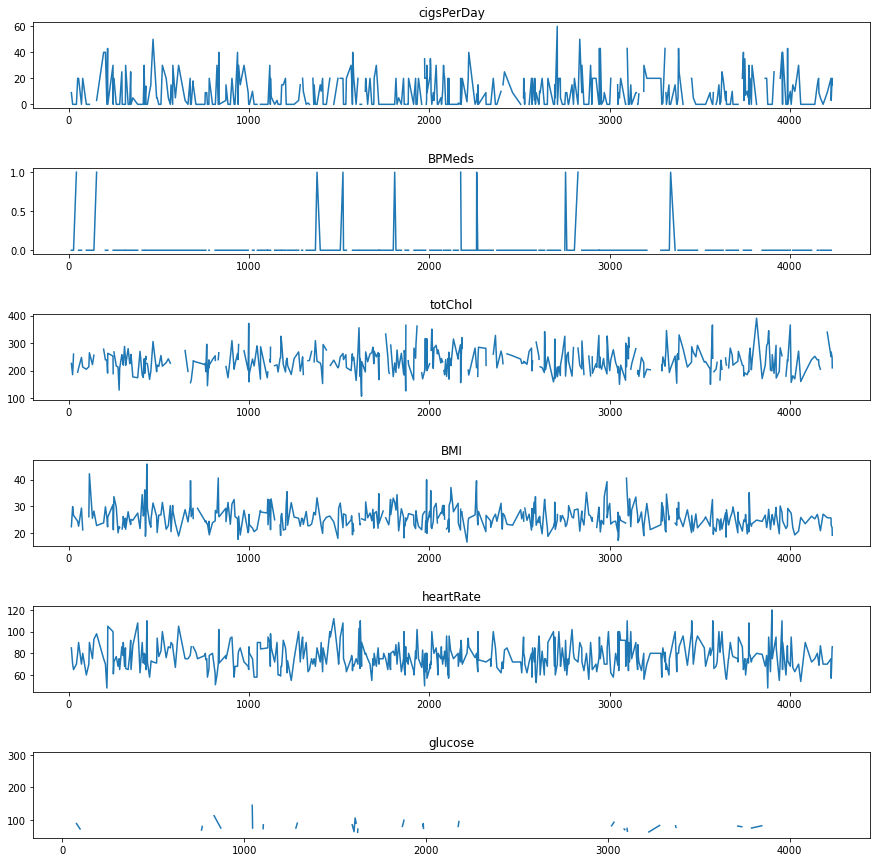

In [33]:
# Plotting the features contains null values to get a better idea.
fig, axs = plt.subplots(len(df_na_values.columns[df_na_values.isna().any()].tolist()) , 1 , figsize = (15 , 15))
plt.subplots_adjust(hspace = .7)
axs = axs.flatten()
i = 0
for c in df_na_values.columns:
    if df_na_values[c].isna().any():
        df_na_values[c].plot(ax = axs[i] , title = c , xlabel = '')
        i += 1

From the plots above we can see the missing values in differnet features. Glucose has the most missing values among the six features. Let's try to fill the values by taking the mean of the columns. This mean values will be used later to predict the missing values.

In [34]:
fill_agg_df = df_na_values.copy() # Making a copy of the dataframe containing missing values.
def fill_with_mean_value(df , columns):
    for c in columns:
        X = df[c].mean() # Mean of the column
        df[c].fillna(X , inplace = True) # Filling out the missing value

In [35]:
fill_with_mean_value(fill_agg_df , ['cigsPerDay' , 'BPMeds' , 'totChol' , 'BMI' , 'heartRate' , 'glucose']) # Filling the missing values with mean value.

In [36]:
# This method plots all the graphs side by side
def plot_side_by_side(original , resulting , columns):
    fig, axs = plt.subplots(len(columns) , 1 , figsize = (16 , 18))
    plt.subplots_adjust(hspace = .7)
    axs = axs.flatten()
    xlim = (original.index.min() , original.index.max())
    i = 0
    for c in columns:
        resulting[c].plot(ax = axs[i] , title = c , xlabel = '' , xlim = xlim , label = 'Modified' , lw = 4 , color = 'red')
        original[c].plot(ax = axs[i] , title = c, xlabel = '' , xlim = xlim , label = 'Original' , color = 'black')
        axs[i].legend()
        i += 1

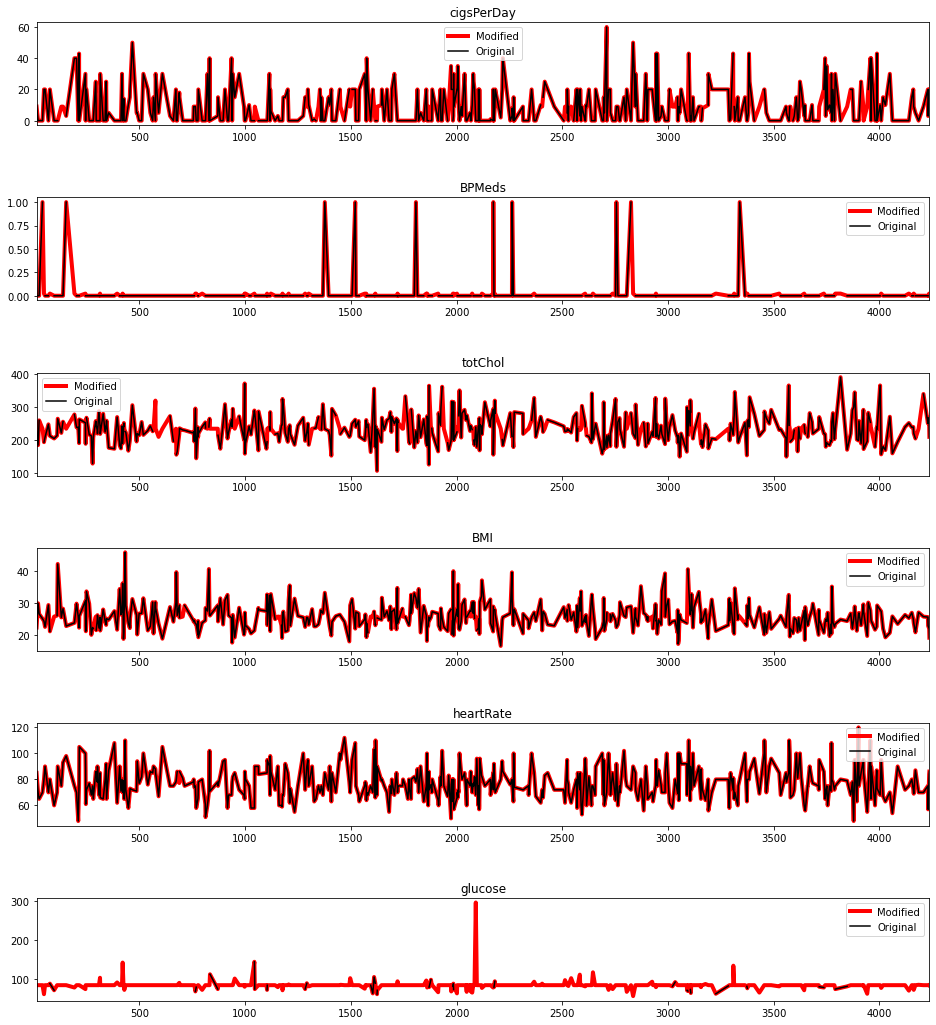

In [37]:
plot_side_by_side(df_na_values , fill_agg_df , ['cigsPerDay' , 'BPMeds' , 'totChol' , 'BMI' , 'heartRate' , 'glucose'])

We can see that we have filled the missing values using mean. This is a baseline strategy which will help us when we move to more sophisticated Machine Learning approach to predict the values with higher accuracy. However, glucose contains too much missing values and it will be kind of impossible for the ML models to predict the columns with so much filled values. As a result, we will be only taking the rows that has glucose value as it will help the ML model to predict the other feature much more accurately.

In [38]:
df_na_values_main_copy = df_na_values.copy() # Keeping a copy of the dataframe
df_na_values = df_na_values[df_na_values['glucose'].notna()] # Taking only the rows that contains glucose value which is omitting the rows without glucose values.

In [39]:
df_na_values

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
77,0,44,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
97,0,40,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
139,1,49,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
193,1,45,1,40.0,NaN,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,0,40,0,0.0,NaN,0,0,0,157.0,131.0,85.0,27.38,95.0,78.0,0
4139,0,53,0,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
4162,0,47,1,9.0,NaN,0,0,0,221.0,127.5,75.0,23.78,69.0,73.0,0
4185,1,58,0,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0


In [40]:
df_na_values.isna().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            10
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

From the sum above we can now understand which features we have to fix now.

We will now scale the dataframe with different scaling techniques and compare the results. This will give us an understanding which combination to take to predict that feature better. We will try Min Max Scaler, Max Absolute Scaler and Quantile Scaler. As for the ML models we are using KNN and liner regression. We also have a feature with boolean value. As a result, ML models with classification techniques (KNN Classifier and SGDClassifier) will be used. This techniques will be used on the clean dataset that we acquired from the Iteration 01

In [41]:
# Making three different data frame based on the scaling techniques

df_minMaxScaler = MinMaxScaler().fit_transform(df)
df_minMaxScaler = pd.DataFrame(df_minMaxScaler , index = df.index , columns = df.columns)

df_maxAbsScaler = MaxAbsScaler().fit_transform(df)
df_maxAbsScaler = pd.DataFrame(df_maxAbsScaler , index = df.index , columns = df.columns)

df_quantileScaler = QuantileTransformer(n_quantiles = 10 , random_state = 0 , output_distribution = 'normal').fit_transform(df)
df_quantileScaler = pd.DataFrame(df_quantileScaler , index = df.index , columns = df.columns)

In [42]:
# This method will run the cross validation based on the given scaling techniques and model is chosen for the columns. From this method's output we will be able to compare all the results to choose a scaling techniques and ML model

# We pass the scaled data, type (regressor / classifier) and the column we want to predict along with other parameters
def run_models(scale , data, pred_col, results , type):
    c = 0
    for d in data:
        X = d.drop([pred_col] , axis = 1).to_numpy() # Dropping the column that we want to predict
        y = df[pred_col].to_numpy() # Column that we want to predict

        cv = RepeatedKFold(n_splits = 10 , n_repeats = 3, random_state = 1)

        if type == 'regressor':
            knn_model = KNeighborsRegressor(n_neighbors = 3)
            knn_scores = cross_val_score(knn_model , X , y , scoring = 'neg_root_mean_squared_error', cv = cv)        

            lg_model = LinearRegression()
            lg_scores = cross_val_score(lg_model , X , y , scoring = 'neg_root_mean_squared_error' , cv = cv)

            results[scale[c] + '_knn'] = knn_scores
            results[scale[c] + '_lg'] = lg_scores
        
        else:
            knn_model = KNeighborsClassifier(n_neighbors = 3)
            knn_scores = cross_val_score(knn_model , X , y , scoring = 'f1_weighted' , n_jobs = -1, cv = cv)          

            sgd_model = SGDClassifier(loss = "squared_error" , penalty = "l2" , max_iter = 500)
            sgd_scores = cross_val_score(sgd_model , X , y , scoring = 'f1_weighted' , cv = cv, n_jobs = -1)

            results[scale[c] + '_knn'] = knn_scores
            results[scale[c] + '_sgd'] = sgd_scores

        c += 1

In [43]:
# This method will plot all the features in a box plot
def plot_results(results, fig_name):
    fig, axs = plt.subplots(3 , 2 , figsize = (30 , 15))
    fig.suptitle('Scaling and ML models combination for ' + fig_name, fontsize = 16)
    axs = axs.flatten()
    c = 0   
    for col in range(0 , len(results.columns) , 2):
        axs[c].boxplot(results.iloc[: , col : col + 1] , labels = [results.columns[col]])
        axs[c + 1].boxplot(results.iloc[: , col + 1 : col + 2], labels = [results.columns[col + 1]])
        c += 2

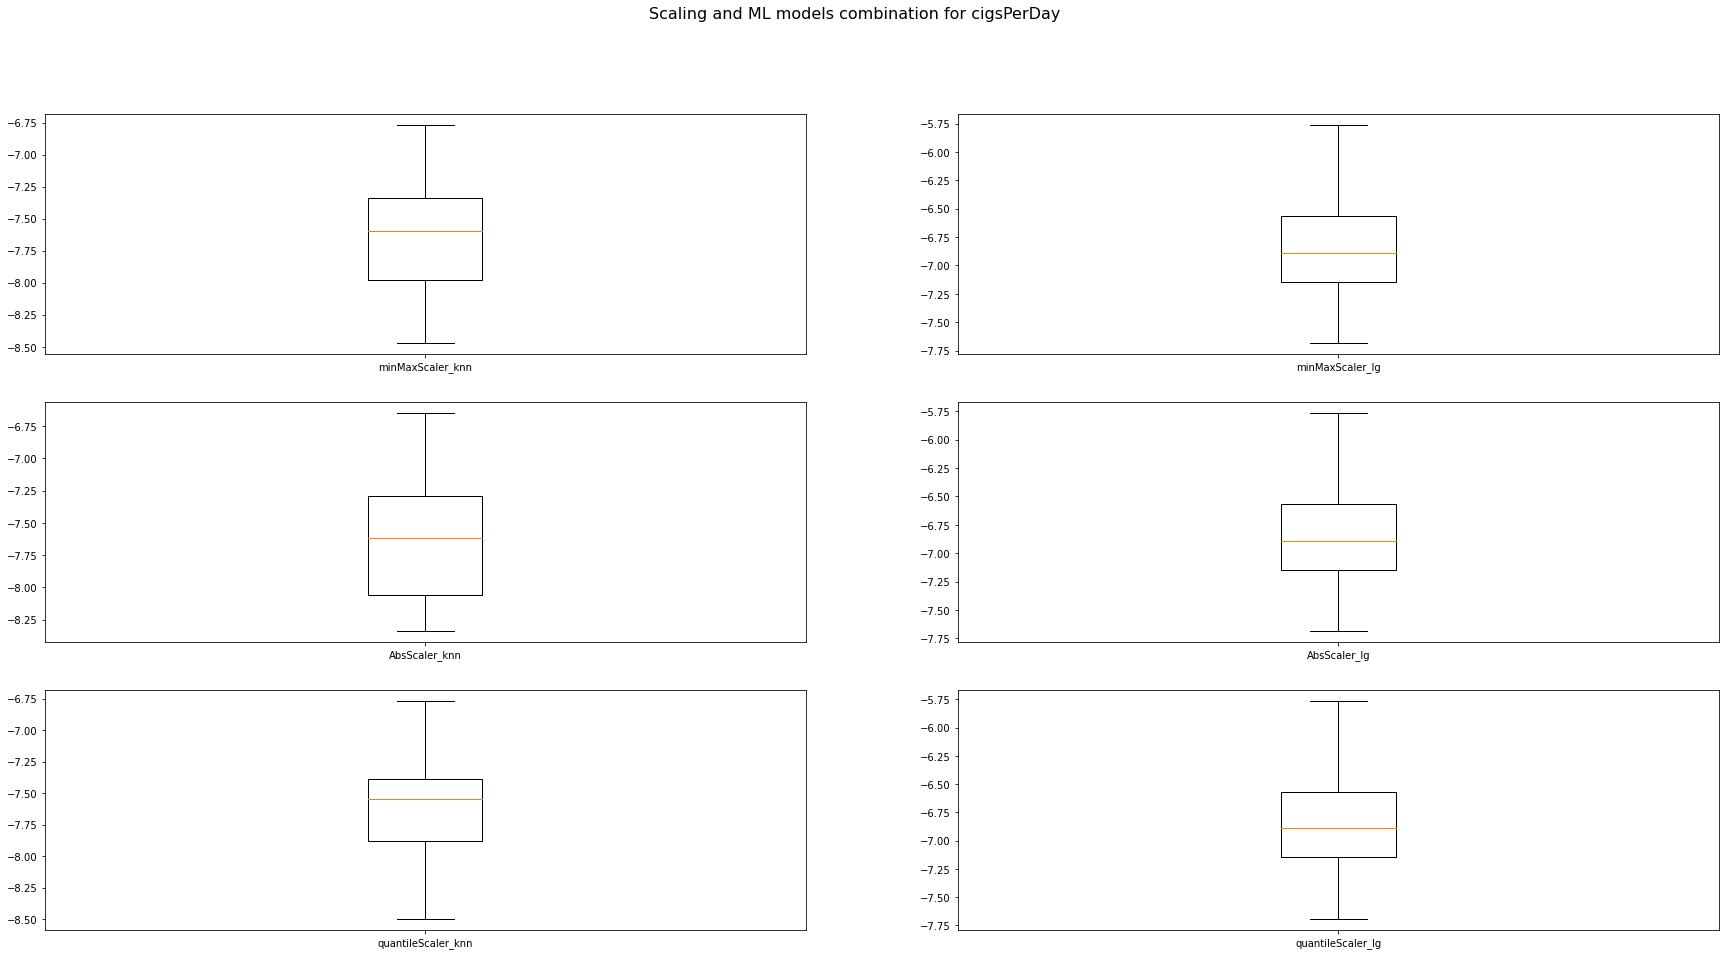

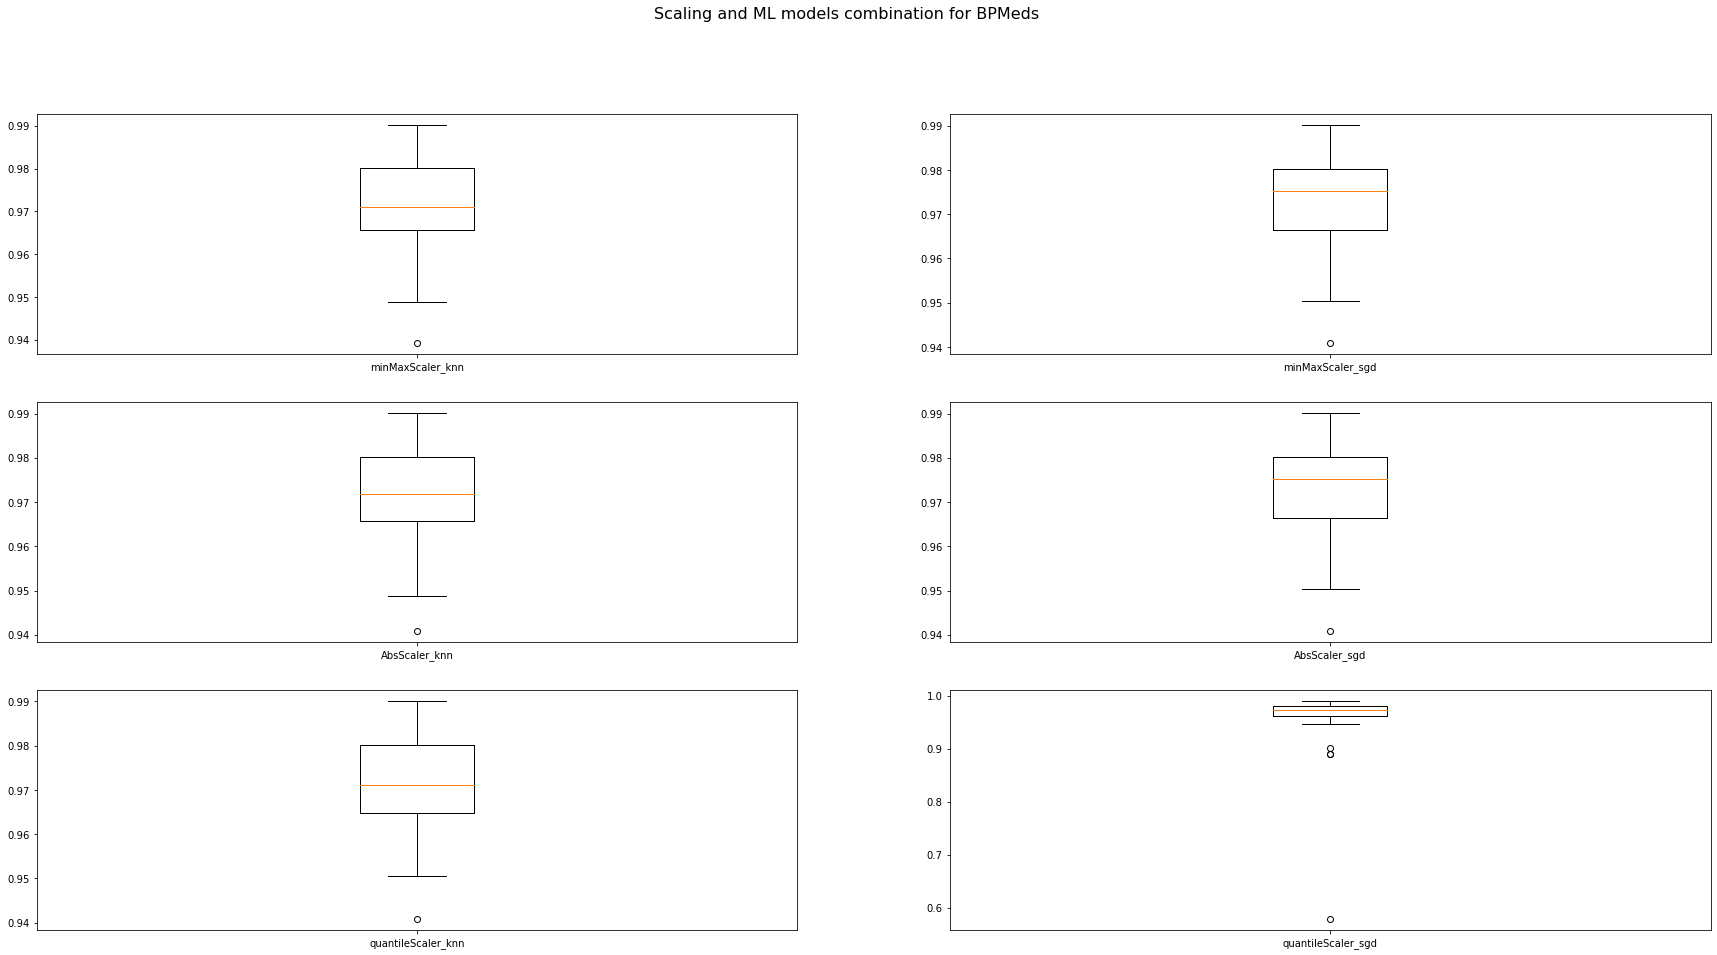

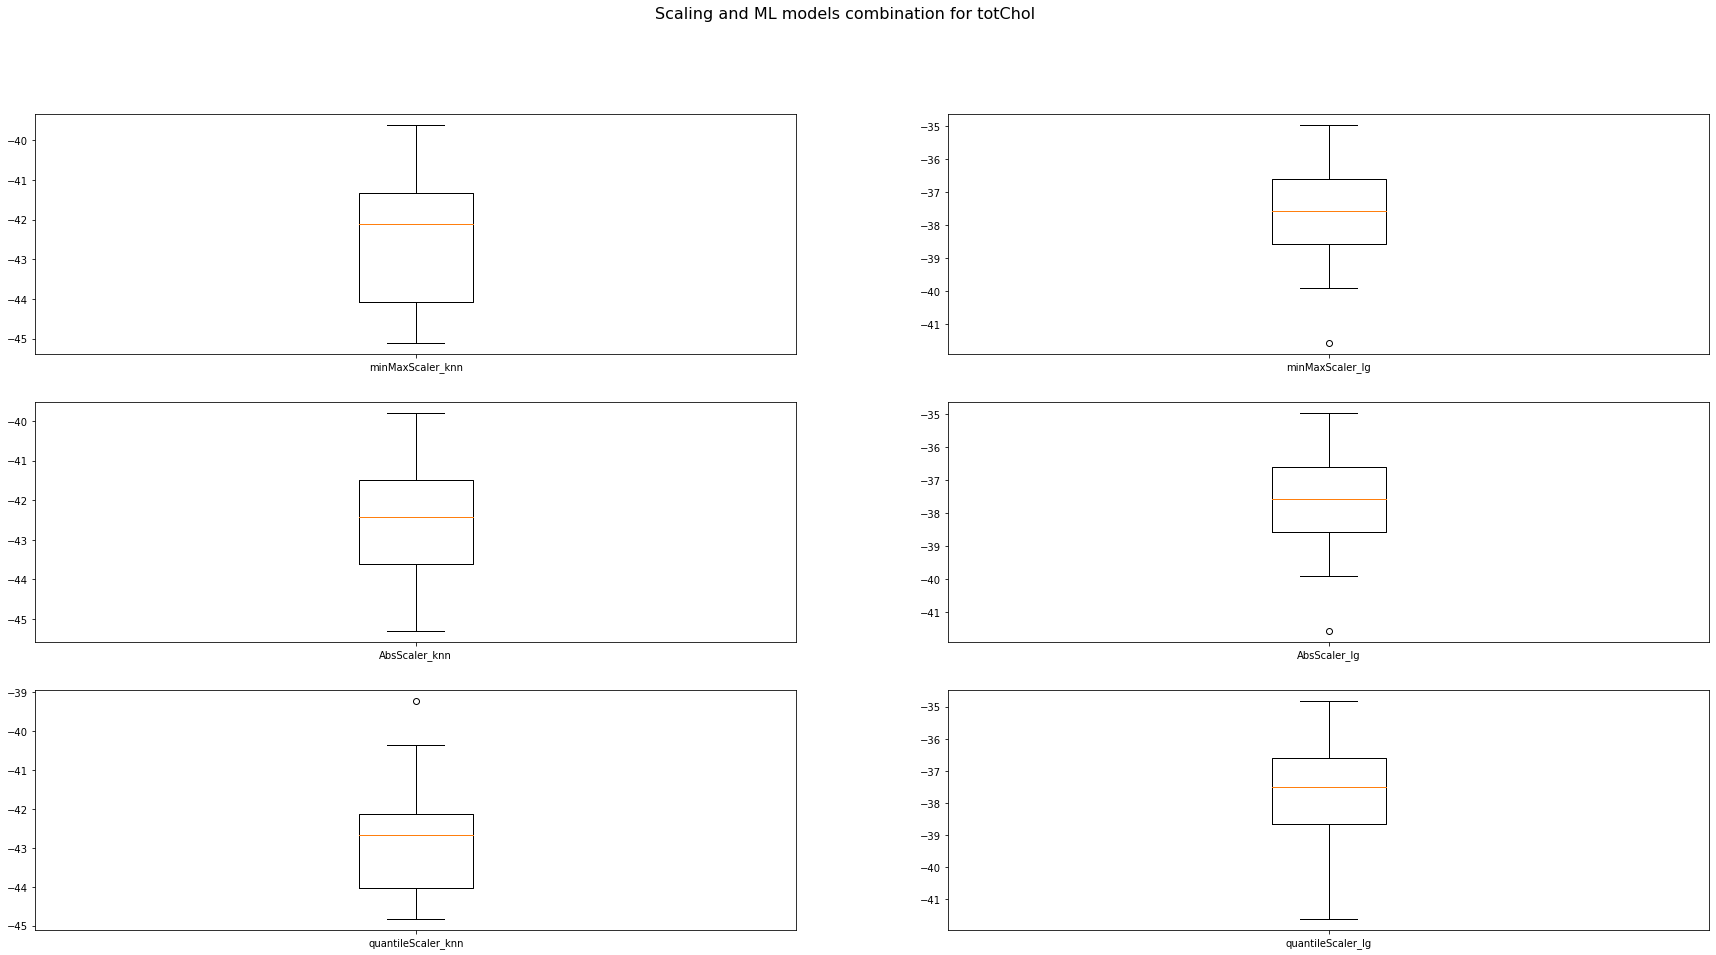

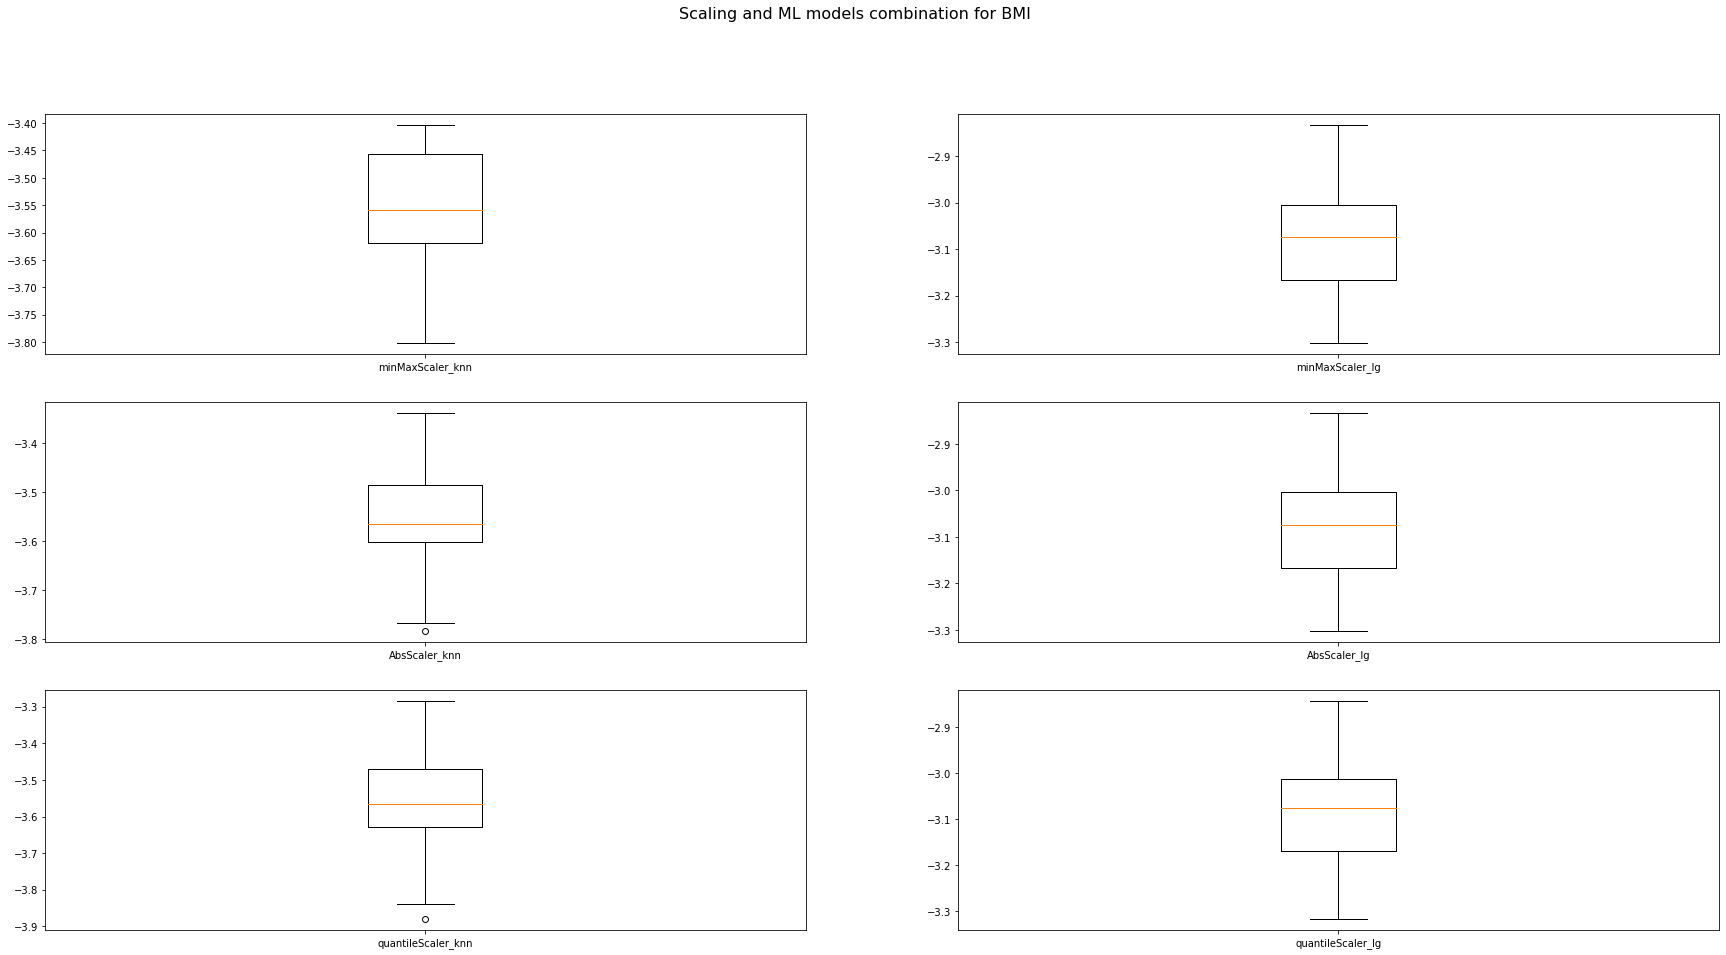

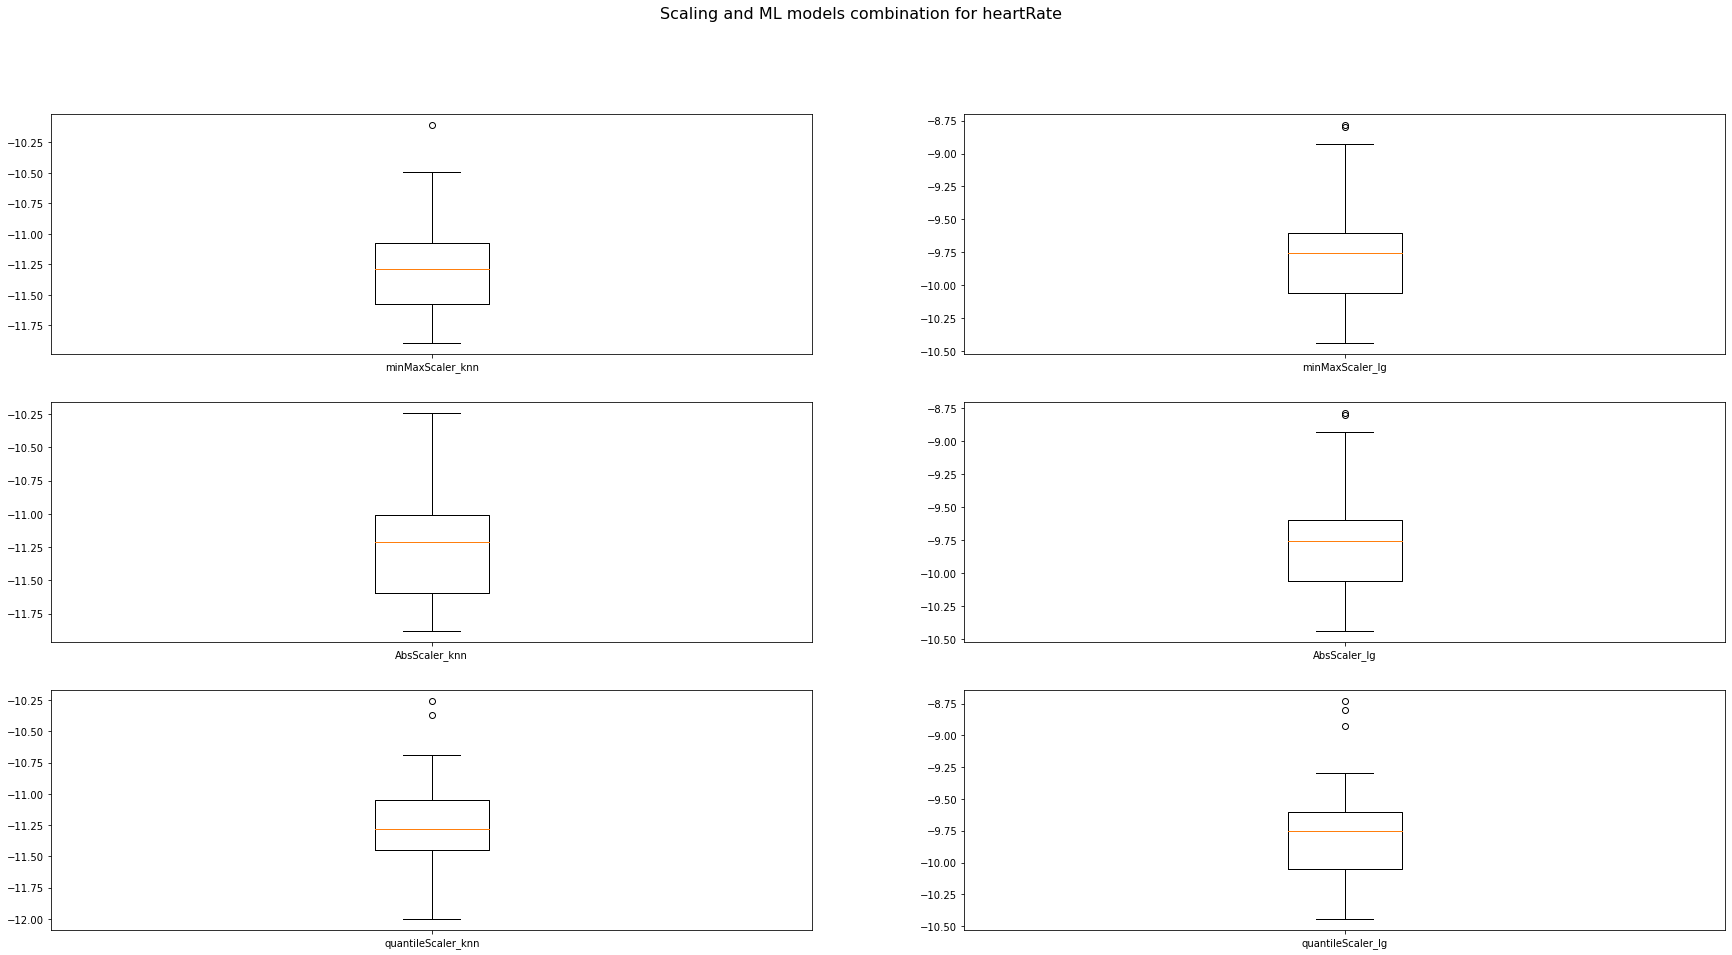

In [44]:
scalers = ['minMaxScaler' , 'AbsScaler' , 'quantileScaler'] # Choosing the scaling techniques
scaled_df = [df_minMaxScaler , df_maxAbsScaler , df_quantileScaler] # Scaled dataframe

# We are creating a dataframe for each column to hold its value. And then running the run_models and ploting the results.

results_cigsPerDay = pd.DataFrame()
run_models(scalers , scaled_df , 'cigsPerDay' , results_cigsPerDay , 'regressor')
plot_results(results_cigsPerDay , 'cigsPerDay')

results_BPMeds = pd.DataFrame()
run_models(scalers , scaled_df , 'BPMeds' , results_BPMeds , 'classifier')
plot_results(results_BPMeds , 'BPMeds')

results_totChol = pd.DataFrame()
run_models(scalers , scaled_df , 'totChol' , results_totChol , 'regressor')
plot_results(results_totChol , 'totChol')

results_BMI = pd.DataFrame()
run_models(scalers , scaled_df, 'BMI', results_BMI , 'regressor')
plot_results(results_BMI , 'BMI')

results_heartRate = pd.DataFrame()
run_models(scalers , scaled_df , 'heartRate' , results_heartRate , 'regressor')
plot_results(results_heartRate , 'heartRate')

In [45]:
results_cigsPerDay.describe().loc[['mean' , 'std' , 'max', 'min']]

,minMaxScaler_knn,minMaxScaler_lg,AbsScaler_knn,AbsScaler_lg,quantileScaler_knn,quantileScaler_lg
mean,-7.623883,-6.872620,-7.596528,-6.872620,-7.617117,-6.875464
std,0.480606,0.451594,0.497307,0.451594,0.456339,0.452411
max,-6.772363,-5.765996,-6.649452,-5.765996,-6.767428,-5.764973
min,-8.473545,-7.686883,-8.338894,-7.686883,-8.499816,-7.692630


In [46]:
results_BPMeds.describe().loc[['mean' , 'std' , 'max' , 'min']]

,minMaxScaler_knn,minMaxScaler_sgd,AbsScaler_knn,AbsScaler_sgd,quantileScaler_knn,quantileScaler_sgd
mean,0.971817,0.973211,0.971546,0.973211,0.971768,0.952559
std,0.011971,0.012224,0.011903,0.012224,0.011804,0.075690
max,0.990077,0.990077,0.990077,0.990077,0.990077,0.990077
min,0.939142,0.940800,0.940800,0.940800,0.940800,0.578317


In [47]:
results_totChol.describe().loc[['mean' ,'std' , 'max' , 'min']]

,minMaxScaler_knn,minMaxScaler_lg,AbsScaler_knn,AbsScaler_lg,quantileScaler_knn,quantileScaler_lg
mean,-42.560962,-37.720960,-42.561327,-37.720960,-42.719489,-37.666240
std,1.629990,1.513887,1.470287,1.513887,1.442924,1.518589
max,-39.625028,-34.975569,-39.795240,-34.975569,-39.219409,-34.820779
min,-45.121983,-41.578924,-45.313375,-41.578924,-44.827560,-41.607282


In [48]:
results_BMI.describe().loc[['mean' , 'std' , 'max' , 'min']]

,minMaxScaler_knn,minMaxScaler_lg,AbsScaler_knn,AbsScaler_lg,quantileScaler_knn,quantileScaler_lg
mean,-3.557305,-3.085739,-3.552072,-3.085739,-3.563729,-3.087522
std,0.119762,0.118572,0.115979,0.118572,0.141455,0.119144
max,-3.404182,-2.833684,-3.338850,-2.833684,-3.284114,-2.843958
min,-3.802583,-3.302809,-3.784229,-3.302809,-3.879916,-3.316504


In [49]:
results_heartRate.describe().loc[['mean' , 'std' , 'max', 'min']]

,minMaxScaler_knn,minMaxScaler_lg,AbsScaler_knn,AbsScaler_lg,quantileScaler_knn,quantileScaler_lg
mean,-11.278789,-9.734775,-11.246375,-9.734775,-11.231626,-9.737263
std,0.413729,0.405416,0.416500,0.405416,0.365767,0.411955
max,-10.110173,-8.786321,-10.242731,-8.786321,-10.255851,-8.729679
min,-11.898534,-10.441831,-11.882655,-10.441831,-12.000892,-10.444204


By comparing all the scaling techniques from the box plot as well as from the data of mean, median, max, min and std we can now choose scaling techniques to predict the missing values.

We can see the on most of the features Linear Regression performed well with Min Max scaler where the RMSE is the lowest and the SGD value is also on the lower side. For the classification problem KNN Classifier with quantile techniques performed well.

Based on the min and max values and also observing the standard deviation values we will be using the following techniques for the following features - 

| Feature Name | ML Model          | Scaling Technique |
|--------------|-------------------|-------------------|
| cigsPerDay   | Linear Regression | Min Max           |
| BPMeds       | KNN Classifier    | quantile          |
| totChol      | Linear Regression | quantile          |
| BMI          | Linear Regression | min_max           |
| heartRate    | Linear Regression | min_max           |

In [50]:
# This method will scale the data based on the parameter passed. We will use this method before training the ML model.

def scale_data(scaler, data , pred_col):
    # We will drop the pred_col as this is the target column.
    if scaler == 'min_max':
        df_scaled = MinMaxScaler().fit_transform(data.drop([pred_col] , axis = 1).to_numpy())
        
    elif scaler == 'max_abs':
        df_scaled = MaxAbsScaler().fit_transform(data.drop([pred_col] , axis = 1).to_numpy())
        
    elif scaler == 'quantile':
        df_scaled = QuantileTransformer(n_quantiles = 10 , random_state = 0 , output_distribution = 'normal').fit_transform(data.drop([pred_col] , axis = 1).to_numpy())
        
    return df_scaled

In [51]:
# This method will run the training and prediction on the dataframe that we have achieved from the iteration 01.

def model_train_pred(model_name, type, scaler, data, pred_col):

    if model_name == 'lg' and type == 'regressor':
        model = LinearRegression()

    elif model_name == 'knn' and type == 'regressor':
        model = KNeighborsRegressor(n_neighbors = 3)

    elif model_name == 'knn' and type == 'classifier':
        model = KNeighborsClassifier(n_neighbors = 3)

    elif model_name == 'sgd' and type == 'classifier':
        model = SGDClassifier(loss = "squared_error" , penalty = "l2" , max_iter = 500)

    elif model_name == 'svc' and type == 'classifier':
        model = svm.SVC(kernel = 'linear')
        
    if scaler == 'min_max':
        df_scaled = MinMaxScaler().fit_transform(data)
        df_scaled = pd.DataFrame(df_scaled , index = data.index , columns = data.columns)

    elif scaler == 'max_abs':
        df_scaled = MaxAbsScaler().fit_transform(data)
        df_scaled = pd.DataFrame(df_scaled , index = data.index , columns = data.columns)
    
    elif scaler == 'quantile':
        df_scaled = QuantileTransformer(n_quantiles = 10 , random_state = 0 , output_distribution = 'normal').fit_transform(data)
        df_scaled = pd.DataFrame(df_scaled , index = data.index , columns = data.columns)

    X = df_scaled.drop([pred_col] , axis = 1).to_numpy()
    y = data[pred_col].to_numpy()

    x_train, x_test , y_train, y_test = train_test_split(X , y, random_state = 1 , test_size = .30)

    model.fit(x_train , y_train)
    test = model.predict(x_test)

    if type == 'regressor':
        print(f'Test RMSE of the model ({model_name} , {type} , {scaler}) for {pred_col} is: ', round(mean_squared_error(y_test , test , squared = False)))
    else:
        print(f'Test Accuracy of the model ({model_name} , {type} , {scaler}) for {pred_col} is: ', round(accuracy_score(y_test , test) * 100 , 2) , '%')

    return model

In [52]:
# This method will fill the missing values from the data frame.
def pred_and_fill(na_df, scaler, pred_col, model):
    missing_value_df = na_df.copy() # Creating a copy of the dataframe
    for c in na_df.columns:
        X = na_df[c].mean() # Getting the mean of the feature
        if c != pred_col:  
            na_df[c].fillna(X , inplace=True) # Filling out the missing values with mean
    
    null_values_pred_col = na_df[na_df[pred_col].isnull()] # Getting the missing value rows of the target feature
    null_values_pred_col_index = na_df[na_df[pred_col].isnull()].index.tolist() # Getting the missing value rows index of the target feature to fill the values with forecasted data

    null_values_pred_col = scale_data(scaler , null_values_pred_col , pred_col) # Scaling the dataframe
    test_output = model.predict(null_values_pred_col) # Predicting the target features missing value

    for i in range(len(null_values_pred_col_index)):
        missing_value_df.at[null_values_pred_col_index[i] , pred_col] = test_output[i] # Filling out the missing values with predicted values
    
    return missing_value_df

In [53]:
# creating prediction models for each features based on the combination detected earlier. 
model_cigsPerDay = model_train_pred('lg' , 'regressor' , 'min_max' , df, 'cigsPerDay')
model_BPMeds = model_train_pred('knn' , 'classifier' , 'quantile' , df, 'BPMeds')
model_totChol = model_train_pred('lg' , 'regressor' , 'quantile' , df, 'totChol')
model_BMI = model_train_pred('lg' , 'regressor' , 'min_max' , df, 'BMI')
model_heartRate = model_train_pred('lg' , 'regressor' , 'min_max' , df, 'heartRate')

Test RMSE of the model (lg , regressor , min_max) for cigsPerDay is:  7
Test Accuracy of the model (knn , classifier , quantile) for BPMeds is:  97.68 %
Test RMSE of the model (lg , regressor , quantile) for totChol is:  37
Test RMSE of the model (lg , regressor , min_max) for BMI is:  3
Test RMSE of the model (lg , regressor , min_max) for heartRate is:  9


In [54]:
# Filling out the missing value columns with our models created
df_na_values = pred_and_fill(df_na_values , 'min_max' , 'cigsPerDay' , model_cigsPerDay)
df_na_values = pred_and_fill(df_na_values , 'min_max' , 'BPMeds' , model_BPMeds)
df_na_values = pred_and_fill(df_na_values , 'quantile' , 'totChol' , model_BPMeds)
df_na_values = pred_and_fill(df_na_values , 'min_max' , 'BMI' , model_BPMeds)
df_na_values = pred_and_fill(df_na_values , 'min_max' , 'heartRate' , model_BPMeds)

In [55]:
df_na_values.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

We have successfully forecasted the missing values as we can see there aren't any null values in the dataframe. But not all ML model are 100% accurate. As a result, few of the predictions will be out of bounds which will identified as outliers. We can perform a box plot to see these outliers. We will only be observing features with continuous values.

In [56]:
columns_fixed = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP' , 'BMI',	'heartRate' , 'glucose']

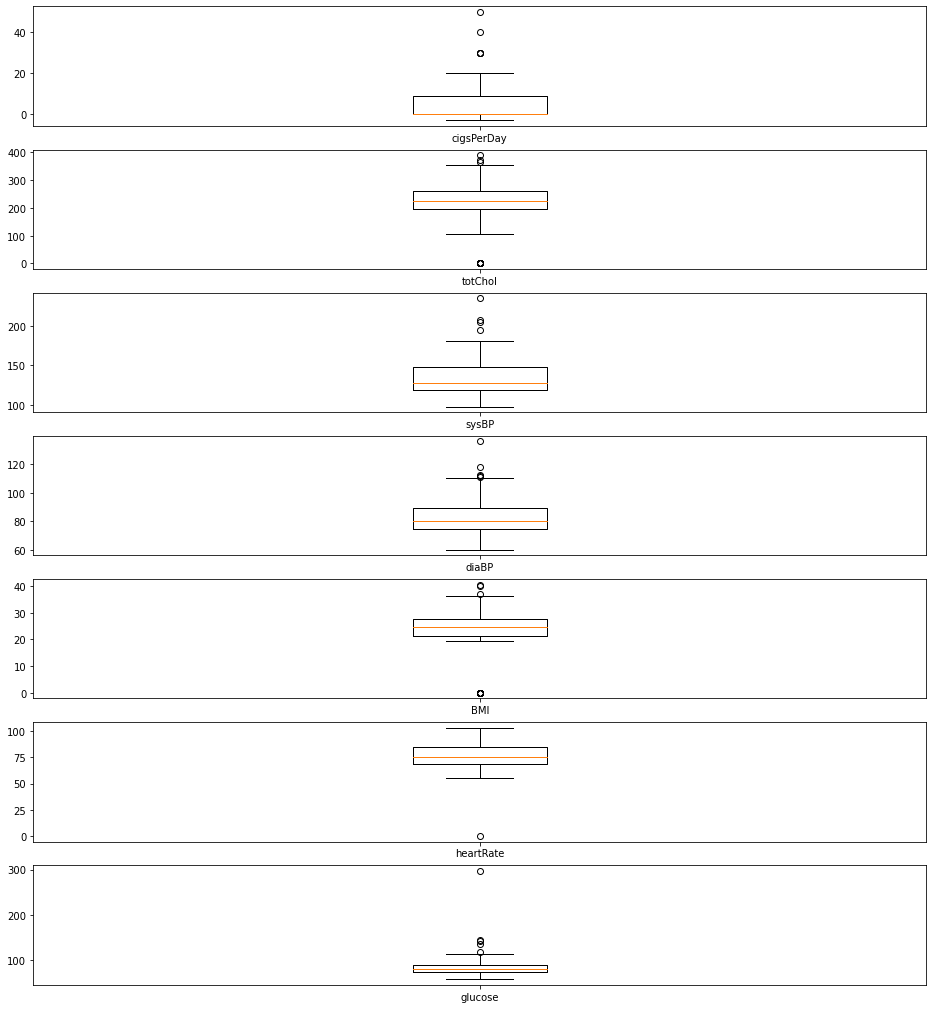

In [57]:
fig, axs = plt.subplots(len(columns_fixed) , 1 , figsize = (16 , 18))
axs = axs.flatten() 
c = 0
for i in columns_fixed:
    axs[c].boxplot(df_na_values[i] , labels=[i])
    c += 1
plt.show()

We can see from the boxplot that there are few outliers on the continuos features. We can use IQR to fix these values. We will be replacing the outliers with quantile values

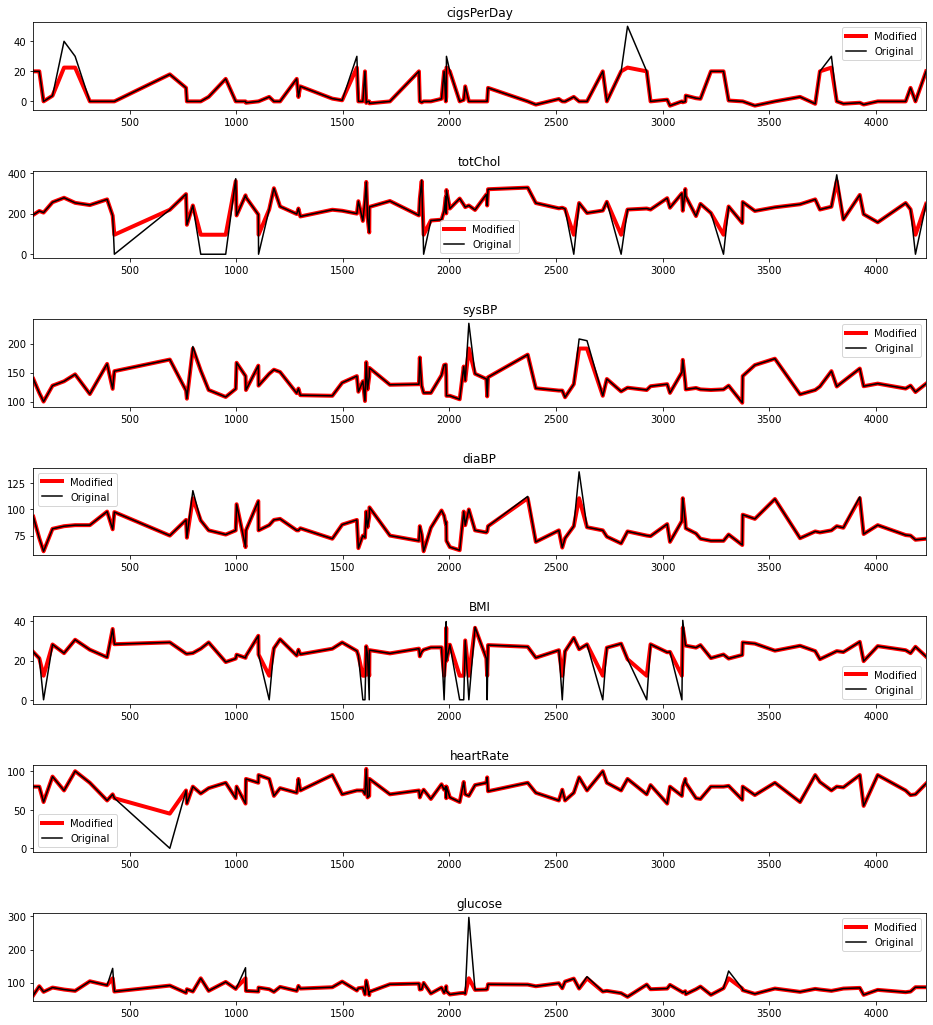

In [58]:
# This method will remove outliers in a particular attribute
def replace_outliers(data, column_name):

    for c in column_name:
        Q1 = data[c].quantile(0.25) # Finding quantile 01 
        Q3 = data[c].quantile(0.75) # Finding quantile 03 
        IQR = Q3 - Q1 # Inter quantile range
        minimum = Q1 - 1.5 * IQR # finding the minimum value to filter data
        maximum = Q3 + 1.5 * IQR # finding the maximum value to filter data

        # Finding and replacing data that are below the minimum values or after the maximum value which are identified as outliers.
        data[c] = np.where(data[c] >= maximum , maximum, np.where(data[c] <= minimum , minimum , data[c]))

df_na_c = df_na_values.copy()        
replace_outliers(df_na_c , columns_fixed)
plot_side_by_side(df_na_values , df_na_c , columns_fixed)

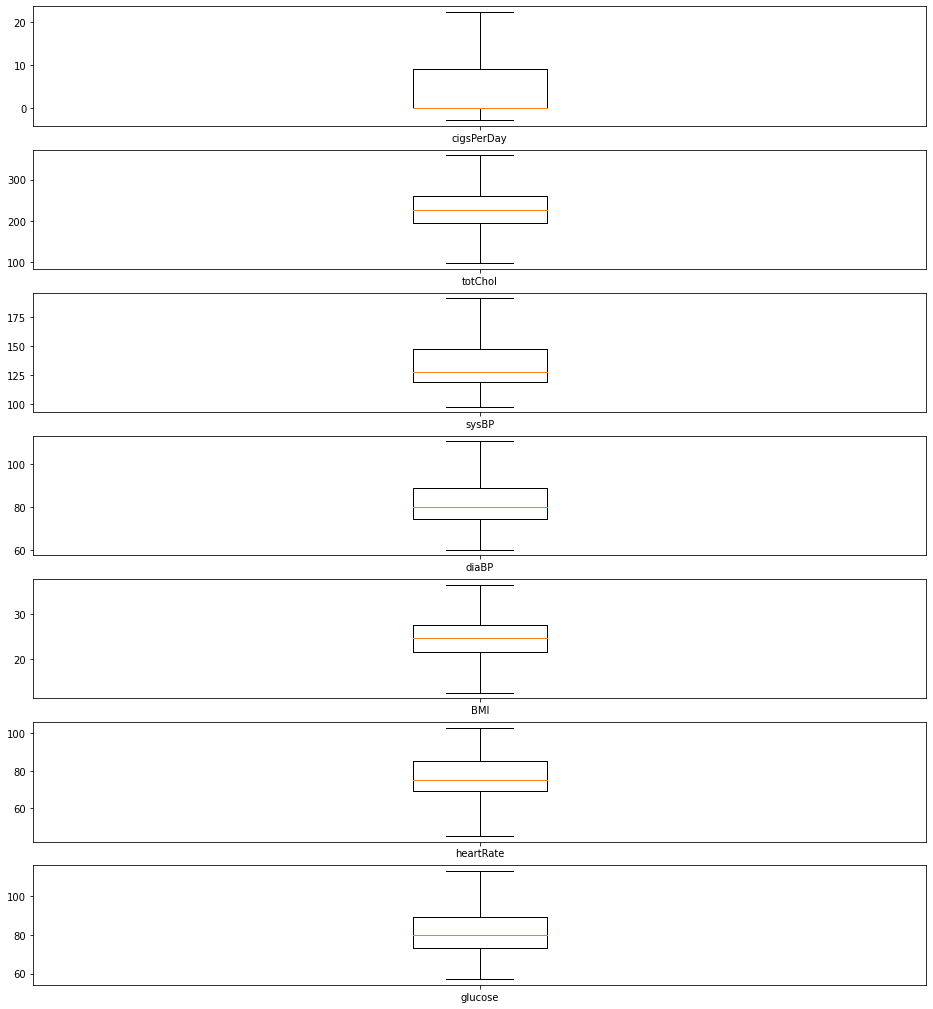

In [59]:
fig, axs = plt.subplots(len(columns_fixed) , 1 , figsize = (16 , 18))
axs = axs.flatten() 
c = 0
for i in columns_fixed:
    axs[c].boxplot(df_na_c[i] , labels = [i])
    c += 1
plt.show()

In [60]:
df_na_values

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,1,36,1,20.000000,0.0,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
77,0,44,1,20.000000,0.0,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
97,0,40,0,0.000000,0.0,0,0,0,205.0,100.0,60.0,0.00,60.0,72.0,1
139,1,49,1,3.783253,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
193,1,45,1,40.000000,0.0,0,0,0,278.0,135.0,84.0,23.79,75.0,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,0,40,0,0.000000,0.0,0,0,0,157.0,131.0,85.0,27.38,95.0,78.0,0
4139,0,53,0,0.000000,0.0,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
4162,0,47,1,9.000000,0.0,0,0,0,221.0,127.5,75.0,23.78,69.0,73.0,0
4185,1,58,0,0.000000,0.0,0,0,0,0.0,116.5,71.0,27.04,70.0,86.0,0


This dataframe contains all the values that we fixed and data without the outliers.

### Part 04: Supervised Learning problem design

Now we have our clean dataset from the Iteration 01 and we fixed most of the missing values in Iteration 02, Part 03. Now we will design an ML model to predict the The Ten Year Chronic Heart Diseases (TenYearCHD). We have different real life data which shows if a person has those features then how likely they are going to face a Heart Disease. For our dataset predicting the TenYearCHD is a classification problem as we have to detect either the person will have a Heart Disease or not. We will first make a baseline model and then try to improve it.

In [61]:
# First lets combine the Iteration 01 dataframe and the dataframe from Iteration 02
df_f = pd.concat([df , df_na_values])

In [62]:
df_f_copy = df_f.copy()

In [63]:
df_f

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,0,40,0,0.0,0.0,0,0,0,157.0,131.0,85.0,27.38,95.0,78.0,0
4139,0,53,0,0.0,0.0,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
4162,0,47,1,9.0,0.0,0,0,0,221.0,127.5,75.0,23.78,69.0,73.0,0
4185,1,58,0,0.0,0.0,0,0,0,0.0,116.5,71.0,27.04,70.0,86.0,0


From previous sections we have seen the dataframe performs well on Min Max Scaler. We will perform that over KNN and SGD Classifier to see what the outcome is.

In [64]:
model =  model_train_pred('knn', 'classifier', 'min_max', df_f, 'TenYearCHD')
model =  model_train_pred('sgd', 'classifier', 'min_max', df_f, 'TenYearCHD')

Test Accuracy of the model (knn , classifier , min_max) for TenYearCHD is:  84.92 %
Test Accuracy of the model (sgd , classifier , min_max) for TenYearCHD is:  87.38 %


As we can see the baseline accuracy for the KNN and SGD are 84.92 and 87.38 Percent accordingly.

For ML models not all the features provides same value in terms of predicting the output. Some features may not provide enough weight and may make the model slower. We can perform feature selection and reduce few of the columns based on it which may improve the ML models accuracy. There are different techniques for finding the optimum features. We have chosen Chi-squared distribution (chi2) for our feature selections.

From [SKLearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) - 
"This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes." 


In [65]:
df_scaled = MinMaxScaler().fit_transform(df_f) # Scaling the data
df_scaled = pd.DataFrame(df_scaled , index = df_f.index , columns = df_f.columns)

X = df_scaled.drop(['TenYearCHD'] , axis = 1) # Dropping the target column
y = df_f['TenYearCHD']

x_train , x_test , y_train , y_test = train_test_split(X , y , random_state = 1 , test_size = .20) # Splitting the dataframe to train and test our model

In [66]:
selector = SelectKBest(chi2 , k = 10) # We are using Chi-squared distribution (chi2) for our feature selections and keeping the high ranked 10 columns for our test
selector.fit(X , y)

cols = selector.get_support(indices = True)
features_df_new = X.iloc[ : , cols] # Contains the features that have highest impact on the target value.

In [67]:
new_features = features_df_new.columns.to_list() # Making column name list
new_features.append('TenYearCHD') # Adding the target column name to filter out those features.

In [76]:
# New features list
features_df_new.columns.to_list()

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'sysBP',
 'diaBP']

In [68]:
df_f_after_drop = df_f[new_features] # Dataframe with the feature selected from chi2

In [69]:
df_scaled = MinMaxScaler().fit_transform(df_f_after_drop) # Scaling the Data frame
df_scaled = pd.DataFrame(df_f_after_drop , index = df_f_after_drop.index , columns = df_f_after_drop.columns)

X = df_scaled.drop(['TenYearCHD'] , axis = 1) # Dropping the target column
y = df_f['TenYearCHD']

x_train, x_test , y_train, y_test = train_test_split(X , y, random_state = 1 , test_size = .20) # Splitting the dataframe to train and test our model

We have filtered out few of our features and now we will try to improve the ML models.  Grid Search helps us to find the optimum parameter for any given model. So, will try to find the parameters for KNN and SGD by using Grid Search

In [70]:
# Grid Search on KNN
knn_grid_search = KNeighborsClassifier()
parameters_for_grid_search = {'n_neighbors' : np.arange(10) , 'weights' : ['uniform' , 'distance'] ,  'leaf_size' : np.arange(10) , 'p' : [1 , 2], 'algorithm' : ['ball_tree' , 'kd_tree' , 'brute']}
knn_grid_search = GridSearchCV(knn_grid_search , parameters_for_grid_search , cv = 5)
knn_grid_search.fit(x_train , y_train)

/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
960 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 549, in _fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [71]:
knn_grid_search.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 4,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [72]:
# Running KNN with the parameters from Grid Search on Dataframe to find its test accuracy
knn_test = knn_grid_search.predict(x_test)
print('Test Accuracy of KNN: ' , round(accuracy_score(y_test , knn_test) * 100 , 2) , '%')

Test Accuracy of KNN:  87.64 %


In [73]:
# Grid Search on SGD
sgd_grid_search = SGDClassifier()
parameters_for_grid_search = {'loss' : ['hinge' , 'log_loss' , 'modified_huber' , 'squared_hinge' , 'perceptron' , 'squared_error'], 'penalty' : ['l1' , 'l2'],  'max_iter' : np.arange(1000 , 5000 , 1000)}
sgd_grid_search = GridSearchCV(sgd_grid_search , parameters_for_grid_search , cv = 5)
sgd_grid_search.fit(x_train , y_train)

/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "/Users/mehadihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py"

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error'],
                         'max_iter': array([1000, 2000, 3000, 4000]),
                         'penalty': ['l1', 'l2']})

In [74]:
sgd_grid_search.best_params_

{'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}

In [75]:
# Running KNN with the parameters from Grid Search on Dataframe to find its test accuracy
sgd_test = sgd_grid_search.predict(x_test)
print('Test Accuracy of SGD: ' , round(accuracy_score(y_test , sgd_test) * 100 , 2) , '%')

Test Accuracy of SGD:  87.32 %


By changing the parameters KNN resulted in higher accuracy on the other hand SGD provided similar result.

Thank you!